In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.interpolate import interp1d
import scipy.optimize as opt
import os
# import importlib
# import seaborn as sns

user_path = '/Users/oliviapereira/Desktop' if (os.path.isdir('/Users/oliviapereira')) else '/Users/audrey/Documents/PHYS469'

### Load Data

In [108]:
folder_path = user_path + '/PHYS469/saturation_spectroscopy/raw_data/10-31-2024/'
raw_probe_pump_data = {}
raw_probe_data = {}

for file_name in os.listdir(folder_path):
    file_name = file_name.strip()
    # Read the lines of the file
    with open(folder_path+file_name, 'r') as f:
        lines = f.readlines()
    # Find end of the header (the line that starts with 'x ys')
    for i, line in enumerate(lines):
        if line.startswith('x	y'):
            lines_to_skip = i
            break

    # Read data (skip header)
    data = np.genfromtxt(folder_path+file_name, skip_header=lines_to_skip, names=True, missing_values='_', filling_values=0)
    reshaped_data = np.vstack([data[field] for field in data.dtype.names]).T

    # Make a dict for the run
    file_dict = {label: reshaped_data[:,i] for i,label in enumerate(data.dtype.names)}
    # Add dict to data dict
    if 'run' in file_name:
        raw_probe_pump_data[file_name[:-4]] = file_dict
    else:
        raw_probe_data[file_name[:-4]] = file_dict

### Raw Data

In [109]:
raw_probe_pump_data.keys(), raw_probe_data.keys(), raw_probe_pump_data['run1'].keys()

(dict_keys(['run20', 'run9', 'run8', 'run19', 'run18', 'run6', 'run15', 'run14', 'run7', 'run5', 'run16', 'run17', 'run4', 'run13', 'run12', 'run1', 'run3', 'run10', 'run11', 'run2']),
 dict_keys(['nopump17', 'nopump16', 'nopump14', 'nopump15', 'nopump11', 'nopump10', 'nopump12', 'nopump13', 'nopump2', 'nopump3', 'nopump1', 'nopump4', 'nopump5', 'nopump7', 'nopump6', 'nopump8', 'nopump9', 'nopump20', 'nopump18', 'nopump19']),
 dict_keys(['x', 'y2', 'y3']))

Averaging the data for the runs

In [118]:
time = raw_probe_pump_data['run1']['x']
avg_probe_pump = np.mean([raw_probe_pump_data[run]['y2'] for run in raw_probe_pump_data.keys()], axis=0)
avg_probe = np.mean([raw_probe_data[run]['y2'] for run in raw_probe_data.keys() if run[:-1]=='nopump'], axis=0)

# make a single interferometer data array
raw_inter1 = np.array([raw_probe_data[run]['y3'] for run in raw_probe_data.keys()])
raw_inter2 = np.array([raw_probe_pump_data[run]['y3'] for run in raw_probe_pump_data.keys()])
raw_inter = np.concatenate((raw_inter1, raw_inter2), axis=0)
avg_inter = np.mean([run for run in raw_inter], axis=0)

Plot the raw data

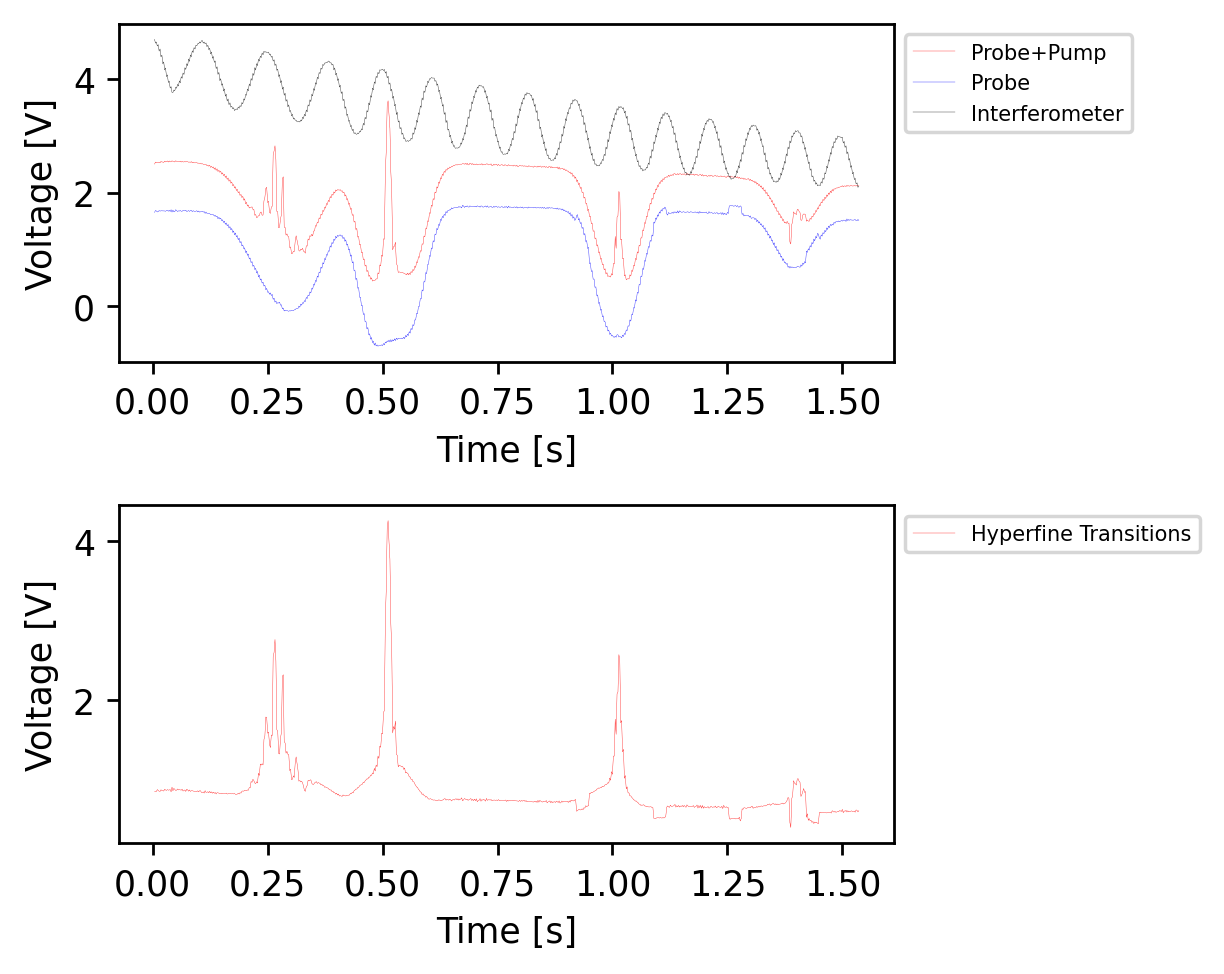

In [122]:
# Figure
fig, axes = plt.subplots(2, 1, figsize=(5,4), dpi=250)

# Get a single frequency sweep
start = np.argwhere(avg_inter == np.max(avg_inter))[0][0]
stop = np.argwhere(avg_inter == np.min(avg_inter))[0][0]
time_multiplier = 1e1
time_axis = time[start:stop]*time_multiplier

# Plot data
axes[0].plot(time_axis, avg_probe_pump[start:stop], color='r', linewidth=0.1, label = 'Probe+Pump')
axes[0].plot(time_axis, avg_probe[start:stop], color='b', linewidth=0.1, label='Probe')
axes[0].plot(time_axis, avg_inter[start:stop], color='k', linewidth=0.1, label='Interferometer')
axes[1].plot(time_axis, (avg_probe_pump-avg_probe)[start:stop], color='r', linewidth=0.1, label = 'Hyperfine Transitions')

for ax in axes:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Voltage [V]')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=6)
plt.tight_layout()
plt.show()


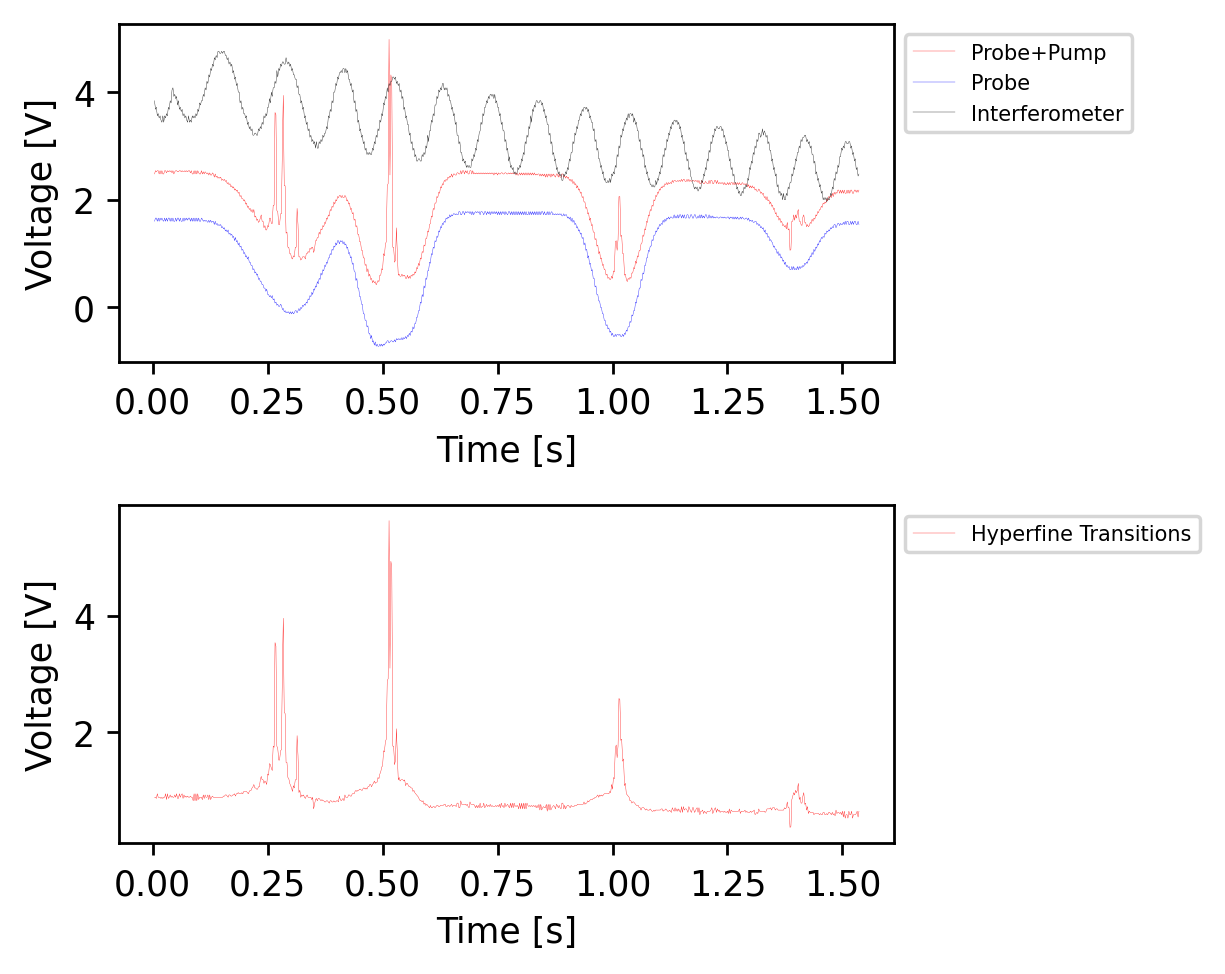

In [124]:
# Figure
fig, axes = plt.subplots(2, 1, figsize=(5,4), dpi=250)

# Get a single frequency sweep
start = np.argwhere(avg_inter == np.max(avg_inter))[0][0]
stop = np.argwhere(avg_inter == np.min(avg_inter))[0][0]
time_multiplier = 1e1
time_axis = time[start:stop]*time_multiplier
probe_run = raw_probe_data['nopump1']['y2']
probe_pump_run = raw_probe_pump_data['run1']['y2']
inter_run = raw_probe_pump_data['run1']['y3']


# Plot data
axes[0].plot(time_axis, probe_pump_run[start:stop], color='r', linewidth=0.1, label = 'Probe+Pump')
axes[0].plot(time_axis, probe_run[start:stop], color='b', linewidth=0.1, label='Probe')
axes[0].plot(time_axis, inter_run[start:stop], color='k', linewidth=0.1, label='Interferometer')
axes[1].plot(time_axis, (probe_pump_run-probe_run)[start:stop], color='r', linewidth=0.1, label = 'Hyperfine Transitions')

for ax in axes:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Voltage [V]')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=6)
plt.tight_layout()
plt.show()
